In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy.stats as stats

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#Replace blank strings with NA and count missing values in each column
df.replace(' ', pd.NA).isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
#For checking blank strings in the 'TotalCharges' column
df[df['TotalCharges'].astype(str).str.strip().eq('')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
#Replace blank strings in 'TotalCharges' with 0 and convert the column to float
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0')
df['TotalCharges'] = df['TotalCharges'].astype(float)                                            

In [9]:
df['TotalCharges'].dtype

dtype('float64')

In [10]:
df['TotalCharges'].isna().sum()

np.int64(0)

In [11]:
df['customerID'].duplicated().sum()

np.int64(0)

In [12]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [13]:
 df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [15]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [16]:
df['Churn'].value_counts(normalize = True).apply(lambda x: f"{x*100:.2f}%")

Churn
No     73.46%
Yes    26.54%
Name: proportion, dtype: object

In [17]:
def conv(value):
    if value == 1:
        return 'Yes'
    else:
        return 'No'

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

In [18]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
df.corr(numeric_only = True)

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.826178
MonthlyCharges,0.247900,1.000000,0.651174
TotalCharges,0.826178,0.651174,1.000000


In [20]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Contract'], df['Churn'])
print(contingency_table)

chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_val}")

Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48
Chi-Square Statistic: 1184.5965720837926
P-Value: 5.863038300673391e-258


In [21]:
contingency_table = pd.crosstab(df['PaymentMethod'], df['Churn'])
print(contingency_table)

chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_val}")

Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308
Chi-Square Statistic: 648.1423274814
P-Value: 3.6823546520097993e-140


In [22]:
contingency_table = pd.crosstab(df['InternetService'], df['Churn'])
print(contingency_table)

chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_val}")

Churn              No   Yes
InternetService            
DSL              1962   459
Fiber optic      1799  1297
No               1413   113
Chi-Square Statistic: 732.309589667794
P-Value: 9.571788222840544e-160


In [23]:
contingency_table = pd.crosstab(df['PaperlessBilling'], df['Churn'])
print(contingency_table)

chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_val}")

Churn               No   Yes
PaperlessBilling            
No                2403   469
Yes               2771  1400
Chi-Square Statistic: 258.27764906707307
P-Value: 4.073354668665985e-58


In [24]:
contingency_table = pd.crosstab(df['StreamingTV'], df['Churn'])
print(contingency_table)

chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_val}")

Churn                  No  Yes
StreamingTV                   
No                   1868  942
No internet service  1413  113
Yes                  1893  814
Chi-Square Statistic: 374.2039433109813
P-Value: 5.528994485739183e-82


In [25]:
contingency_table = pd.crosstab(df['StreamingMovies'], df['Churn'])
print(contingency_table)

chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_val}")

Churn                  No  Yes
StreamingMovies               
No                   1847  938
No internet service  1413  113
Yes                  1914  818
Chi-Square Statistic: 375.6614793452656
P-Value: 2.667756755723681e-82


In [26]:
temp_df = df.copy()
temp_df['Churn'] = temp_df['Churn'].map({'Yes': 1, 'No': 0})
temp_df.groupby('Contract')['Churn'].mean().apply(lambda x: f"{x*100:.2f}%")

Contract
Month-to-month    42.71%
One year          11.27%
Two year           2.83%
Name: Churn, dtype: object

In [27]:
temp_df.groupby('PaymentMethod')['Churn'].mean().apply(lambda x: f"{x*100:.2f}%")

PaymentMethod
Bank transfer (automatic)    16.71%
Credit card (automatic)      15.24%
Electronic check             45.29%
Mailed check                 19.11%
Name: Churn, dtype: object

In [28]:
temp_df.groupby('InternetService')['Churn'].mean().apply(lambda x: f"{x*100:.2f}%")

InternetService
DSL            18.96%
Fiber optic    41.89%
No              7.40%
Name: Churn, dtype: object

In [29]:
temp_df['TenureGroup'] = pd.cut(temp_df['tenure'], bins=[0, 12, 24, 48, 72], labels=['0-1 yr', '1-2 yrs', '2-4 yrs', '4+ yrs'])
temp_df.groupby('TenureGroup', observed=False)['Churn'].mean().apply(lambda x: f"{x*100:.2f}%")

TenureGroup
0-1 yr     47.68%
1-2 yrs    28.71%
2-4 yrs    20.39%
4+ yrs      9.51%
Name: Churn, dtype: object

In [30]:
temp_df['ChargeGroup'] = pd.qcut(temp_df['MonthlyCharges'], q=4, labels=['Lower ($18.25–$35.50)', 
    'Mid-Low ($35.50–$70.35)', 
    'Mid-High ($70.35–$89.85)', 
    'Higher ($89.85–$118.75)'])
temp_df.groupby('ChargeGroup', observed=False)['Churn'].mean().apply(lambda x: f"{x*100:.2f}%")

ChargeGroup
Lower ($18.25–$35.50)       11.24%
Mid-Low ($35.50–$70.35)     24.58%
Mid-High ($70.35–$89.85)    37.51%
Higher ($89.85–$118.75)     32.88%
Name: Churn, dtype: object

# Visualization

In [31]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Churn Distribution (Overall)

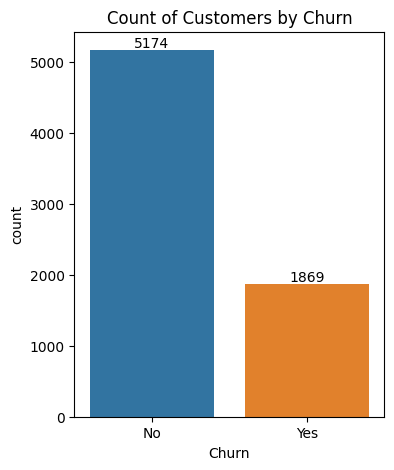

In [32]:
plt.figure(figsize= (4,5))
ax = sns.countplot(x= 'Churn', data= df, hue= 'Churn')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count of Customers by Churn')
plt.show()

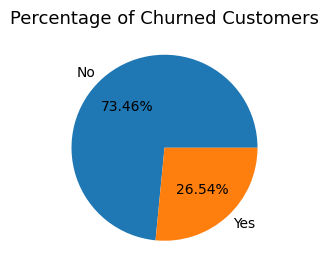

In [33]:
plt.figure(figsize = (3,4))
gb = df.groupby('Churn').agg({'Churn' : 'count'})
plt.pie(gb['Churn'], labels= gb.index, autopct = '%1.2f%%')
plt.title('Percentage of Churned Customers', fontsize = 13)
plt.show()

#from the given pie chart we have conclude that 26.54% of our customers have churned out.
#now let's explore the reason behind it.

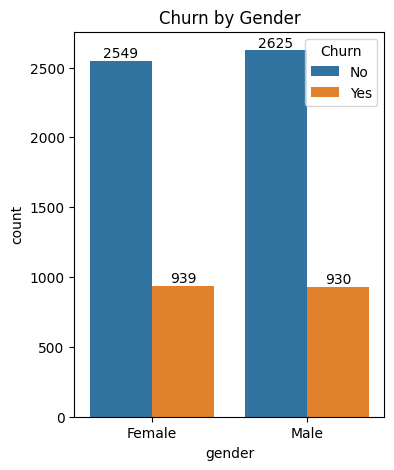

In [34]:
plt.figure(figsize= (4,5))
ax= sns.countplot(x= "gender", data= df, hue= "Churn")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Churn by Gender")
plt.show()

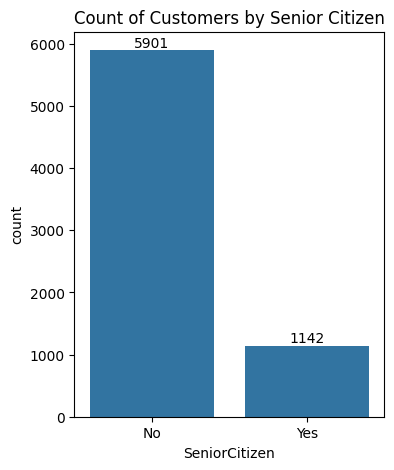

In [35]:
plt.figure(figsize= (4,5))
ax= sns.countplot(x= "SeniorCitizen", data= df)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Count of Customers by Senior Citizen")
plt.show()

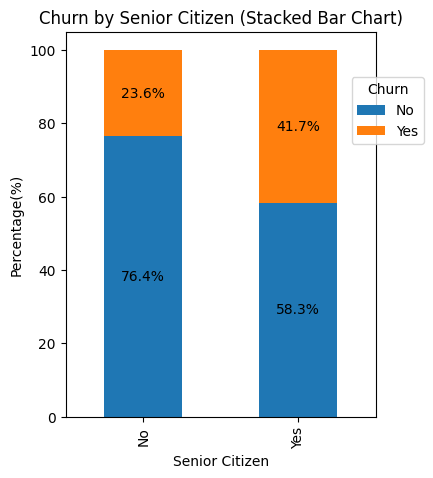

In [36]:
# Calculate percentage counts and create a stacked bar chart
df_percent = df.groupby(["SeniorCitizen", "Churn"]).size().unstack().pipe(lambda x: x.div(x.sum(axis=1), axis=0) * 100)
ax = df_percent.plot(kind="bar", stacked=True, figsize=(4,5), color=["#1f77b4", "#ff7f0e"])

for bar in ax.containers:
    ax.bar_label(bar, fmt= "%.1f%%", label_type="center")

plt.legend(title="Churn", bbox_to_anchor= (0.9,0.9))
plt.title("Churn by Senior Citizen (Stacked Bar Chart)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage(%)")
plt.show()

#comparatively a greater percentage of people in senior citizen category have churned.

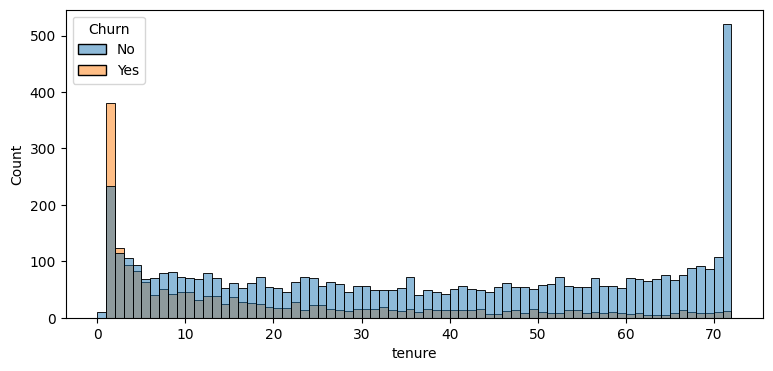

In [37]:
plt.figure(figsize= (9,4))
sns.histplot(x= "tenure", data= df, bins= 72, hue= "Churn")
plt.show()

#people who have used our services for a long time have stayed and people who have used our services for 1 or 2 months have churned.

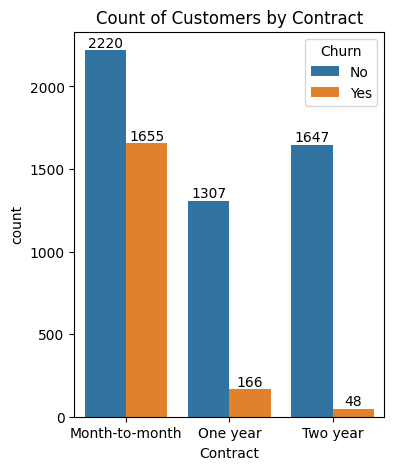

In [38]:
plt.figure(figsize= (4,5))
ax= sns.countplot(x= "Contract", data= df, hue= "Churn")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Count of Customers by Contract")
plt.show()

#people who have month to month contract are more likely to churn then from those who have 1 or 2 years of contracts.

In [39]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

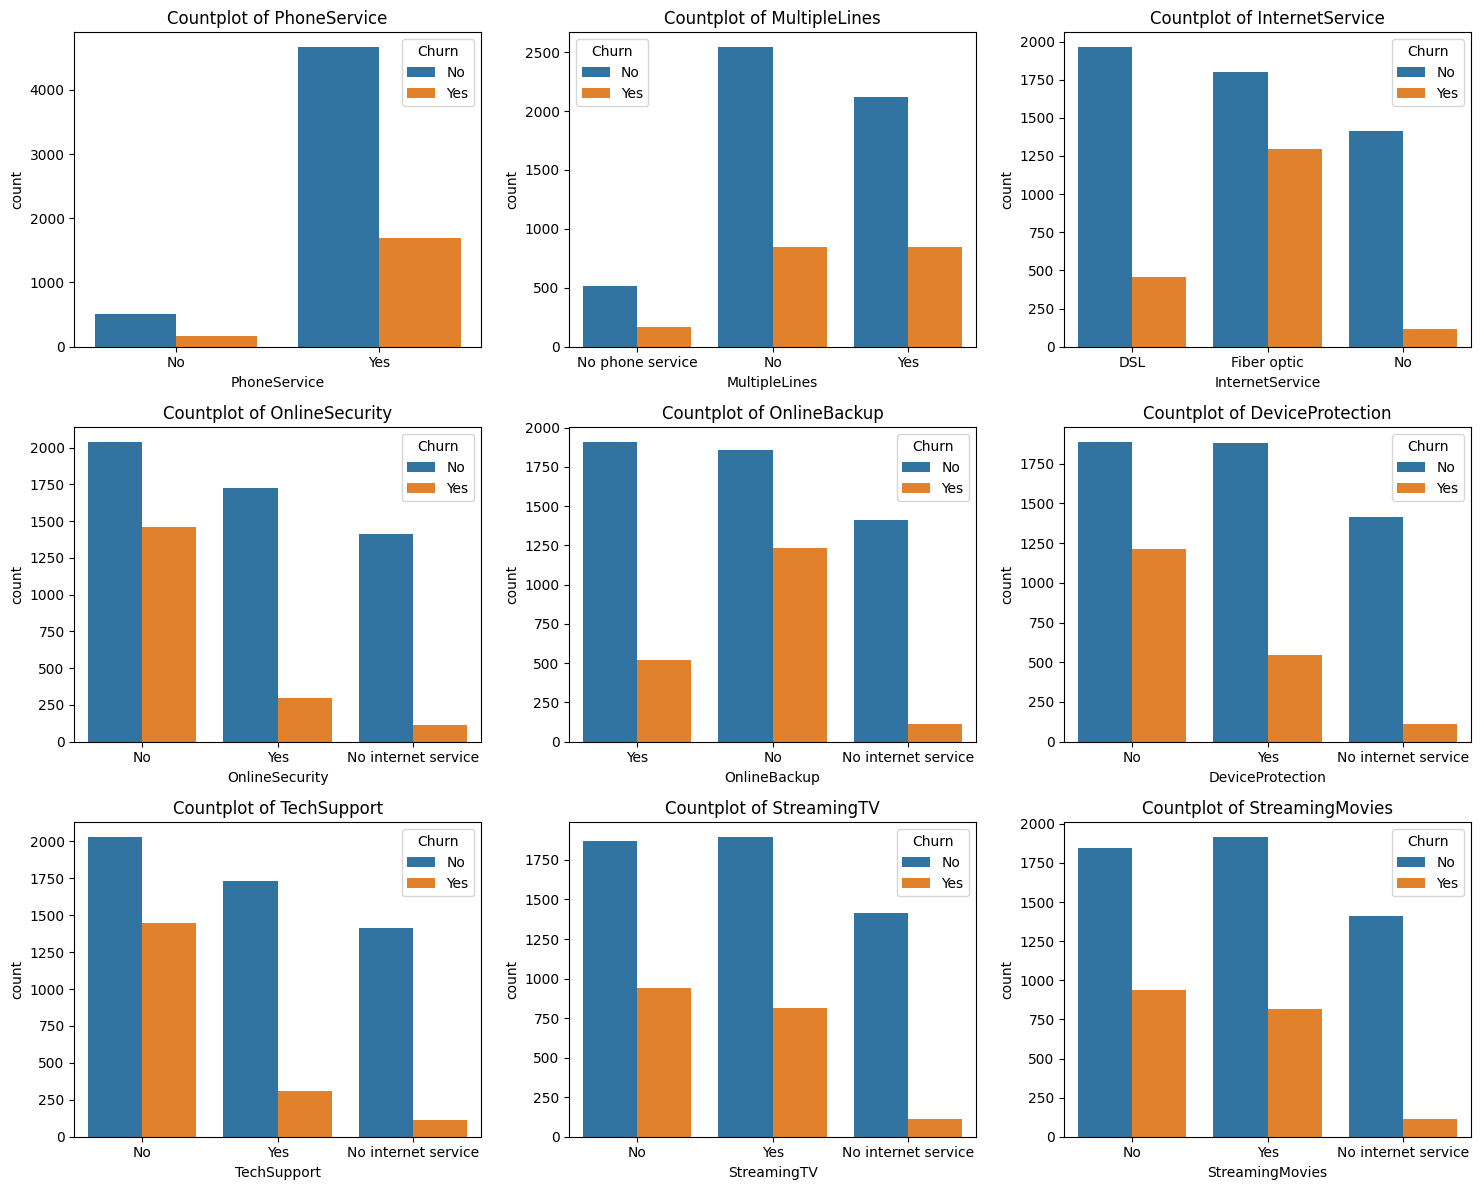

In [40]:
# List of columns to plot
cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Define number of columns and rows for subplots
n_cols = 3  # Number of columns per row
n_rows = (len(cols) + n_cols - 1) // n_cols  # Computes required rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4)) #Adjust figsize as needed
axes = axes.flatten()  # Flatten to easily iterate

# Create countplot for each feature
for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=axes[i], hue= "Churn")
    axes[i].set_title(f"Countplot of {col}")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

#higher churn rates are observed among customers using Fiber optic under Internet Service and those who do not subscribe to services like Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, and Streaming Movies. In contrast, customers with Phone Service and Multiple Lines are more likely to stay.

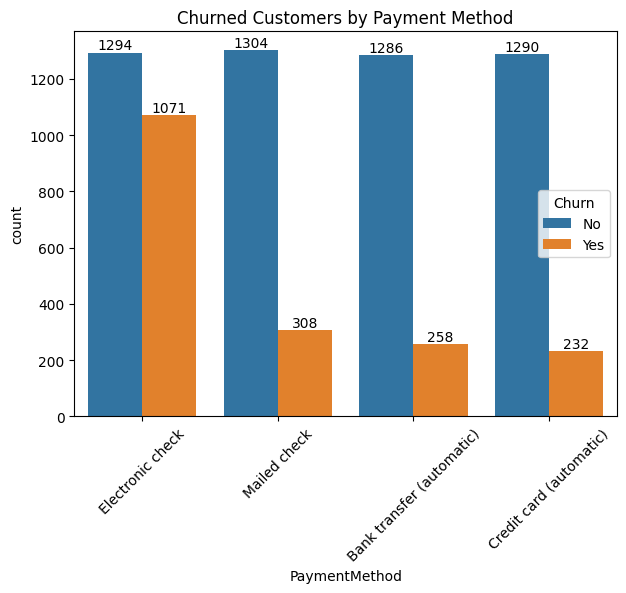

In [48]:
plt.figure(figsize= (7,5))
ax= sns.countplot(x= "PaymentMethod", data= df, hue= "Churn")
for container in ax.containers:
    ax.bar_label(container)

plt.title("Churned Customers by Payment Method")
plt.xticks(rotation= 45)
plt.show()

#customers are likely to churn when they are using electronic check as a payment method.